In [13]:
import pandas as pd
import datetime
import nepali_datetime
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("../csv_files/daily_energy_values.csv")
df.head(2)

,date,nea,nea_subsidiary,ipp,import,total_energy_available,energy_export,inps_demand,energy_interruption,generation_deficit,energy_requirement,net_exchange_with_india
0,2079/05/30,9482,12503,18521,11,40517.0,9316,31201,0,0,31201,0
1,2079/06/10,9302,12852,20023,264,42441.0,8913,33528,0,0,33528,0


In [4]:
# Convert to nepali_datetime
def to_bs_date(date_str):
    y, m, d = map(int, date_str.split('/'))
    return nepali_datetime.date(y, m, d)

df['bs_date'] = df['date'].apply(to_bs_date)

# Create 'month' column in 'YYYY-MM' format
df['month'] = df['bs_date'].apply(lambda d: f"{d.year}-{d.month:02d}")

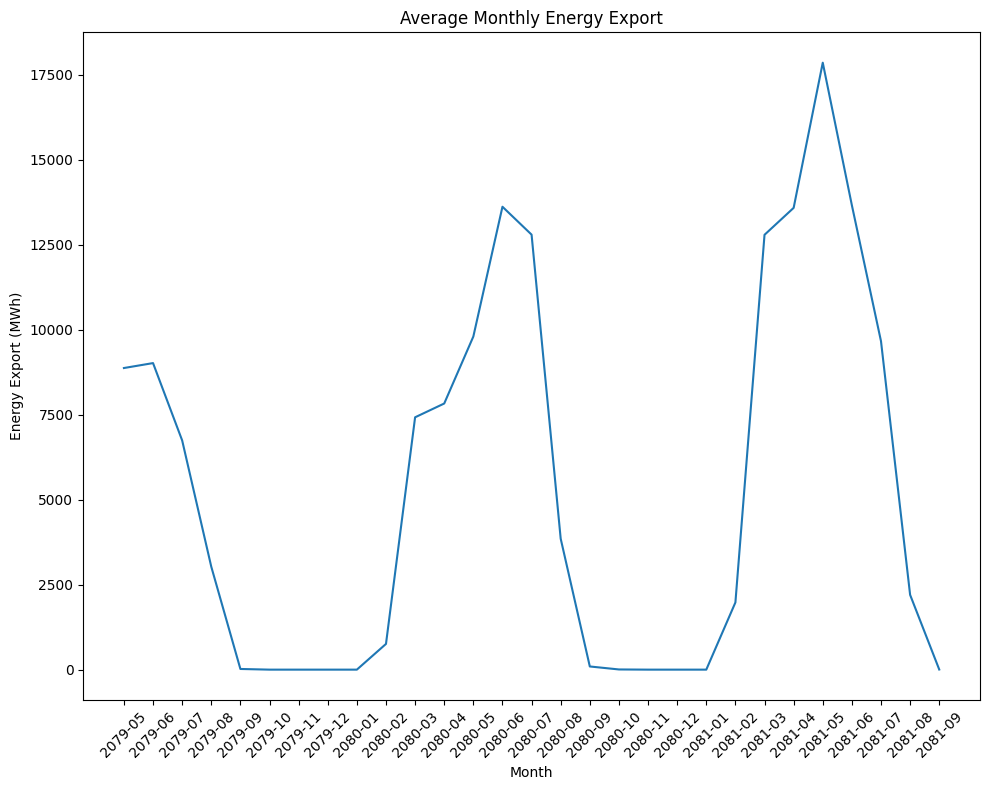

In [5]:
# Group by month and calculate mean energy export
monthly_export = df.groupby('month')['energy_export'].mean()

plt.figure(figsize=(10,8))
plt.plot(monthly_export.index.astype(str), monthly_export.values)
plt.title('Average Monthly Energy Export')
plt.xlabel('Month')
plt.ylabel('Energy Export (MWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


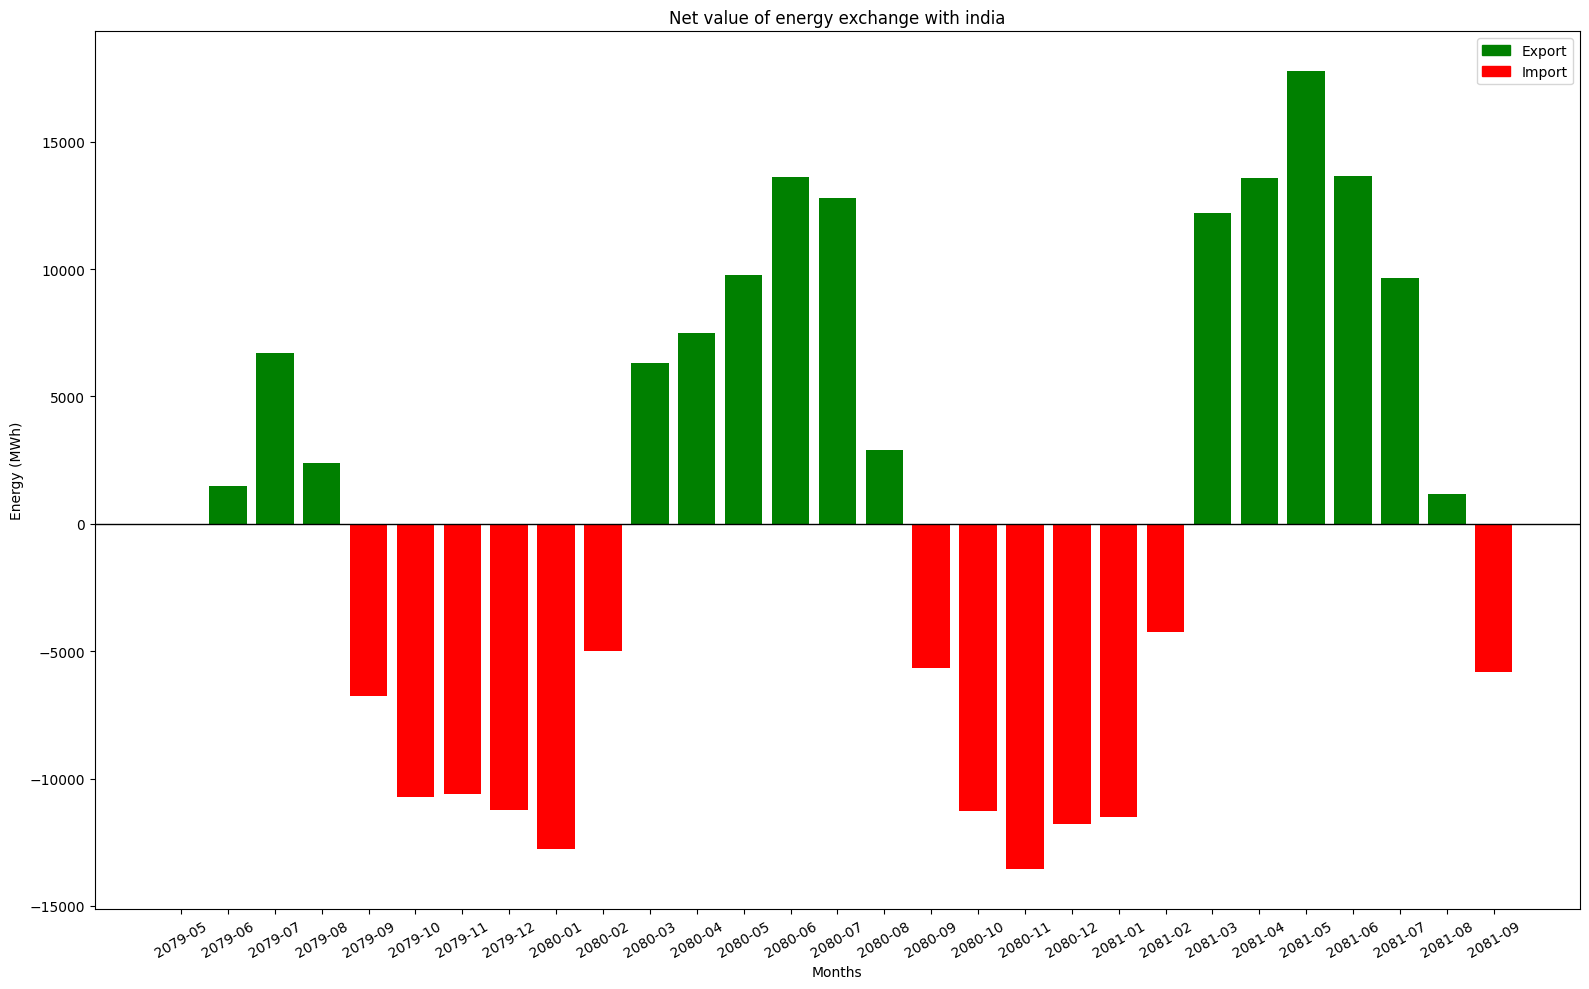

In [6]:
# Group by month and calculate mean energy export/import
monthly_export = df.groupby('month')['net_exchange_with_india'].mean()

# Generate color list - flip the logic since we're inverting values
colors = ['red' if val > 0 else 'green' for val in monthly_export.values]

# Plot with negated values
plt.figure(figsize=(16, 10))
plt.bar(monthly_export.index, -monthly_export.values, color=colors)

plt.axhline(0, color='black', linewidth=1)
plt.title('Net value of energy exchange with india')
plt.xlabel('Months')
plt.ylabel('Energy (MWh)')
plt.xticks(rotation=30)

# Add legend
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='green', label='Export')
red_patch = mpatches.Patch(color='red', label='Import')
plt.legend(handles=[green_patch, red_patch])

plt.tight_layout()
plt.show()

Energy Generation

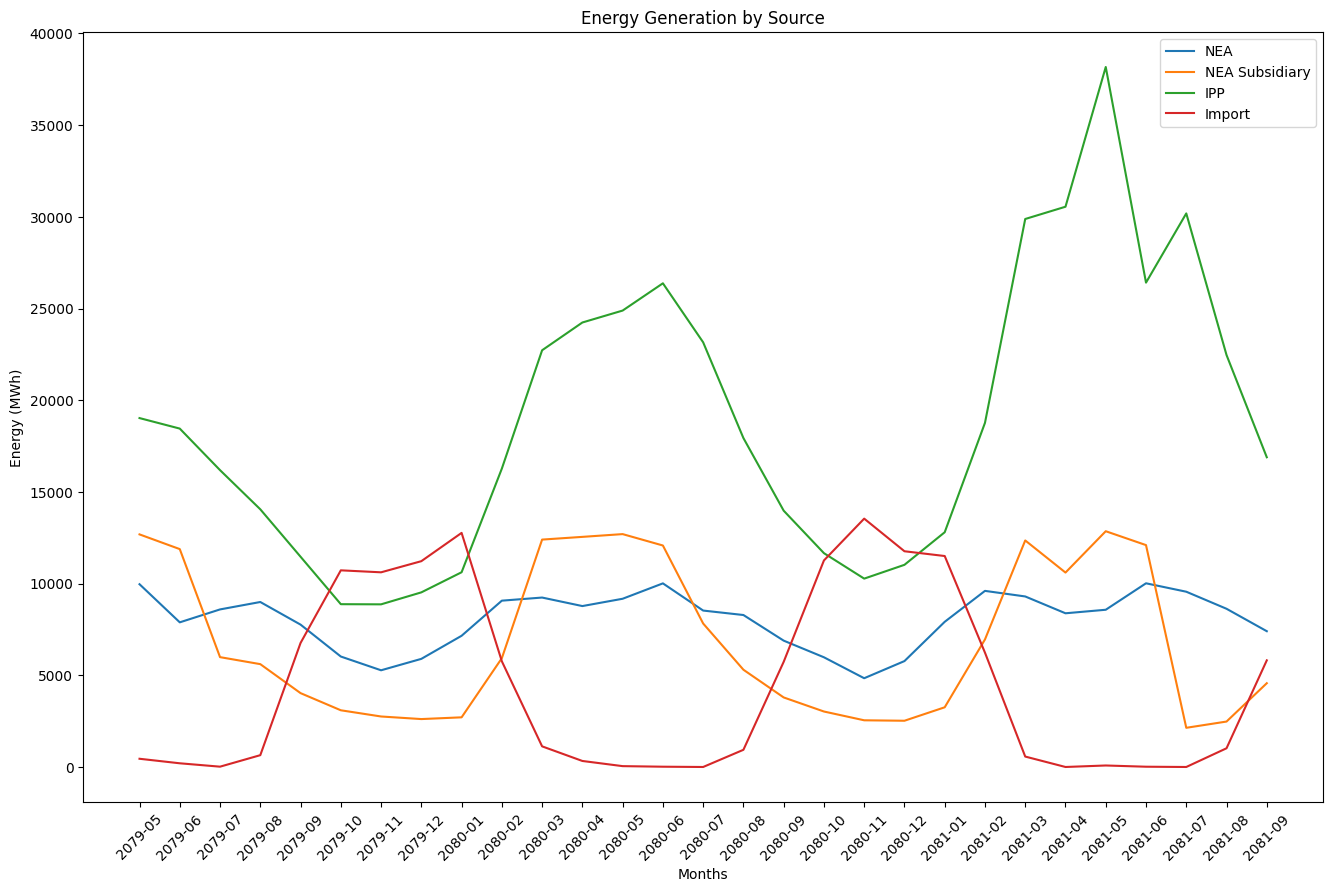

In [7]:
plt.figure(figsize=(16, 10))
nea_gen = df.groupby('month')['nea'].mean()
nea_subs_gen=df.groupby('month')['nea_subsidiary'].mean()
ipp_gen=df.groupby('month')['ipp'].mean()
import_gen=df.groupby('month')['import'].mean()
plt.plot(nea_gen.index, nea_gen.values, label='NEA')
plt.plot(nea_subs_gen.index, nea_subs_gen.values, label='NEA Subsidiary')
plt.plot(ipp_gen.index, ipp_gen.values, label='IPP')
plt.plot(import_gen.index, import_gen.values, label='Import')
plt.title('Energy Generation by Source')
plt.xlabel('Months')
plt.ylabel('Energy (MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.show()  

## Demand and Cross Border Exchange at Peak Time

In [15]:
df = pd.read_csv('../csv_files/demand_cb_exchange@peak_time.csv')
df.head(2)

,date,pk_time,generation,import,recorded_pk_availablity,export,demd_met@pk_time,interruption,deficit,pk_demd_met,net_exchange_with_india
0,2079/05/30,19:00,1796,0,1796,241,1555,0,0,1555,-241.0
1,2079/06/10,18:30,1868,54,1922,300,1622,0,0,1622,-246.0


In [26]:
# Check unique values in pk_time column
print("Unique values in pk_time column:")
print(df['pk_time'].unique())


Unique values in pk_time column:
['19:00' '18:30' '18:55' '18:40' '19:20' '18:45' '18:50' '19:10' '18:35'
 '19:15' '19:05' '18:20' '18:25' '18:10' '18:05' '18:00' '17:55' '17:50'
 '17:45' '17:40' '18:15' '19:25' '19:30' '19:35' '19:50' '19:45' '19:40'
 '19:55' '0:00']


In [28]:
df[df['pk_time'] == '0:00']

,date,pk_time,generation,import,recorded_pk_availablity,export,demd_met@pk_time,interruption,deficit,pk_demd_met,net_exchange_with_india,hour
696,2081/04/25,0:00,0,0,0,0,0,0,0,0,0.0,0
697,2081/04/26,0:00,0,0,0,0,0,0,0,0,0.0,0
698,2081/04/27,0:00,0,0,0,0,0,0,0,0,0.0,0
699,2081/04/28,0:00,0,0,0,0,0,0,0,0,0.0,0


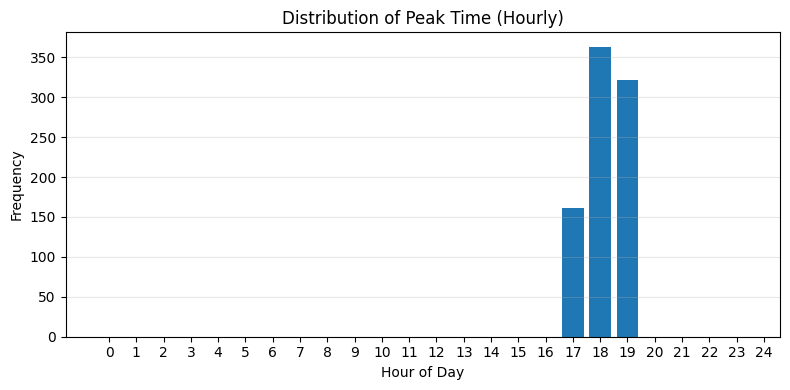

In [31]:
plt.figure(figsize=(8, 4))

# Remove rows where pk_time is '0:00'
df = df[df['pk_time'] != '0:00']

# Convert pk_time to hours for proper counting
# Replace semicolons with colons first to handle inconsistent time formats
df['pk_time'] = df['pk_time'].str.replace(';', ':') 
df['hour'] = pd.to_datetime(df['pk_time'], format='%H:%M').dt.hour

# Create histogram with 24 bins (one for each hour)
plt.hist(df['hour'], bins=range(25), align='left', rwidth=0.8)
plt.title("Distribution of Peak Time (Hourly)")
plt.xlabel("Hour of Day") 
plt.ylabel("Frequency")
plt.xticks(range(25))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()